# 02 [練習] 圖形化我們的成果

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. 上次的成果拿回來使用

記得上次我們做了個鳶尾花分類器。

### 1.1 找回我們的分類器

In [2]:
from sklearn.externals import joblib

In [3]:
clf = joblib.load("iris_clf_01.pkl")

真的可以用了嗎?

In [4]:
clf.predict([[2,3]])

array([2])

可以! 太棒了!

### 1.2 看看我們分類的全貌

我們用一下之前的方式, 畫出我們想要看到我們可愛的 SVM 是怎麼以花萼長度、花萼寬度來分類的。上次我們用了 Python 所謂 "list comprehension" 的作法 (本質上是 `for` 迴圈), 現在我們換個方式看來比較「高級」的方式。

In [5]:
xt, yt = np.meshgrid(np.arange(-2,2,0.5), np.arange(-1,1,0.5))

In [6]:
xt

array([[-2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5],
       [-2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5],
       [-2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5],
       [-2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5]])

In [7]:
yt

array([[-1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. ],
       [-0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5]])

看得出來 `meshgrid` 做了什麼呢? 基本上它就是說我們在 x, y 兩個指定範圍的長方型當中, 依我們指定的間隔找出格點。這些格點的座標分成 x 座標一個 array, y 座標一個。x 或 y 座標的 array, 的座標是一列一列標記的。

要是你覺得這樣的表示法很討厭, 我們也可以讓它變一長串的向量。

In [8]:
xt.ravel()

array([-2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5, -2. , -1.5, -1. ,
       -0.5,  0. ,  0.5,  1. ,  1.5, -2. , -1.5, -1. , -0.5,  0. ,  0.5,
        1. ,  1.5, -2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5])

注意這其實原來的 `xt` 並沒有變哦。

In [9]:
xt

array([[-2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5],
       [-2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5],
       [-2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5],
       [-2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5]])

我們可以把 (x,y) 一點一點的座標收集起來嗎?

In [10]:
np.c_[xt.ravel(), yt.ravel()]

array([[-2. , -1. ],
       [-1.5, -1. ],
       [-1. , -1. ],
       [-0.5, -1. ],
       [ 0. , -1. ],
       [ 0.5, -1. ],
       [ 1. , -1. ],
       [ 1.5, -1. ],
       [-2. , -0.5],
       [-1.5, -0.5],
       [-1. , -0.5],
       [-0.5, -0.5],
       [ 0. , -0.5],
       [ 0.5, -0.5],
       [ 1. , -0.5],
       [ 1.5, -0.5],
       [-2. ,  0. ],
       [-1.5,  0. ],
       [-1. ,  0. ],
       [-0.5,  0. ],
       [ 0. ,  0. ],
       [ 0.5,  0. ],
       [ 1. ,  0. ],
       [ 1.5,  0. ],
       [-2. ,  0.5],
       [-1.5,  0.5],
       [-1. ,  0.5],
       [-0.5,  0.5],
       [ 0. ,  0.5],
       [ 0.5,  0.5],
       [ 1. ,  0.5],
       [ 1.5,  0.5]])

把資料的型式這樣變來變去會是數據分析非常非常常做的事情。

我們經這麼多廢話後終於可以來做正事。

In [11]:
xx, yy = np.meshgrid(np.arange(3, 8.5, 0.2), np.arange(1.5, 5.0, 0.2))

In [12]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

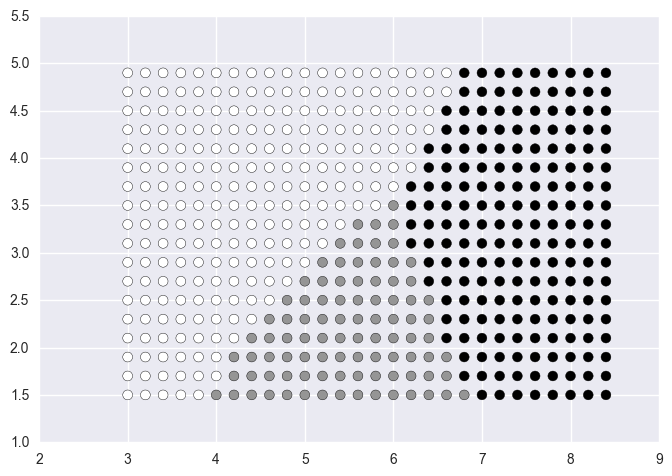

In [13]:
plt.scatter(xx.ravel(), yy.ravel(), s=50, c=Z)

雖然看來我們用了比較多白痴的方法做出一樣的事, 不過一些技巧之後也可以常常使用。

### 1.3 快速換個配色

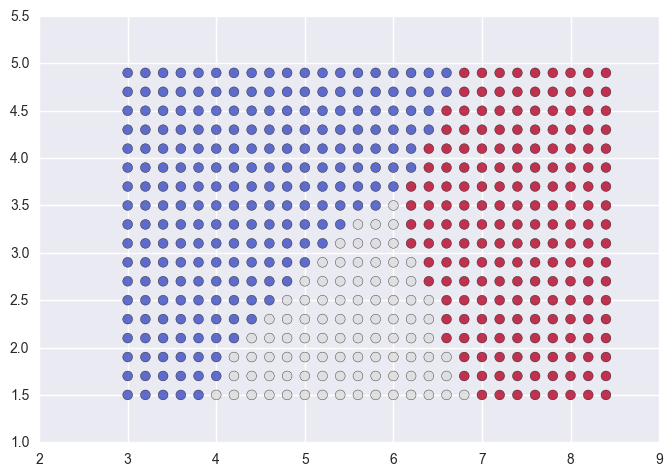

In [14]:
plt.scatter(xx.ravel(), yy.ravel(), s=50, c=Z, cmap=plt.cm.coolwarm, alpha=0.8)

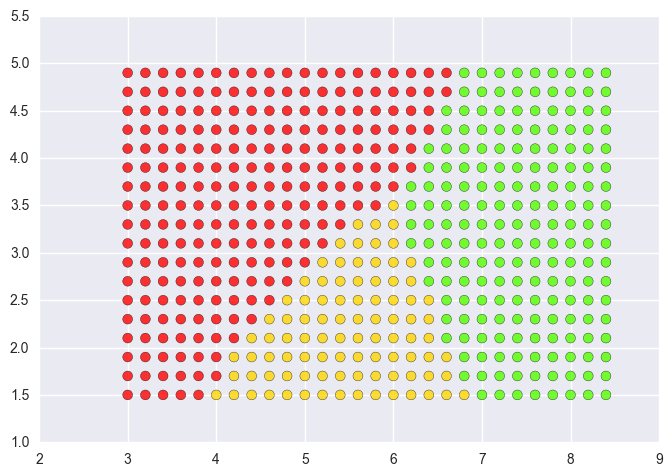

In [15]:
plt.scatter(xx.ravel(), yy.ravel(), s=50, c=Z, cmap=plt.cm.prism, alpha=0.8)

#### 詳細的內容

[matplotlib 顏色參考](http://matplotlib.org/examples/color/colormaps_reference.html)

### 1.4 取回鳶尾花訓練資料

In [16]:
from sklearn.datasets import load_iris
iris = load_iris()

In [17]:
x = iris.data[:, :2]
y = iris.target

我們來畫畫比較。

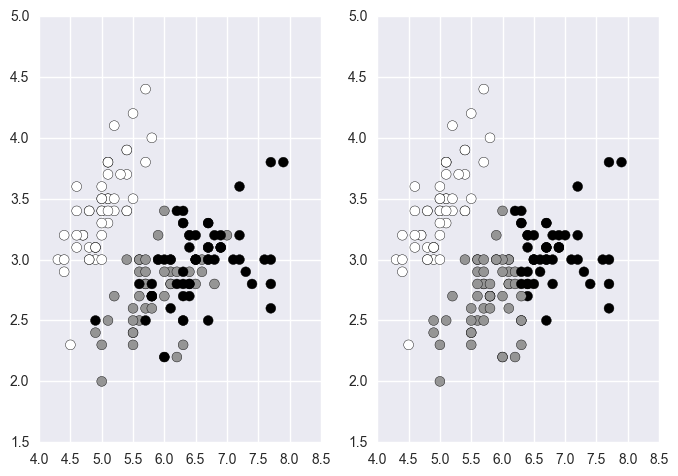

In [18]:
plt.subplot(121)
plt.scatter(x[:,0], x[:,1], s=50, c=y)

plt.subplot(122)
plt.scatter(x[:,0], x[:,1], s=50, c=clf.predict(x))

左邊的是訓練資料, 右邊是用我們 SVM 分類器分出來的。你有看出差異嗎? 是不是很難看出? 我們來用用另一個方式。 

### 1.5 畫圖的另一個方式

In [19]:
xx, yy = np.meshgrid(np.arange(3, 8.5, 0.02), np.arange(1.5, 5.0, 0.02))

In [20]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

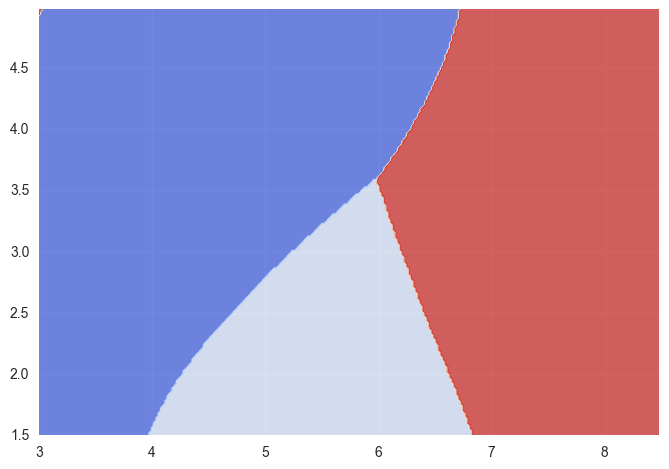

In [21]:
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

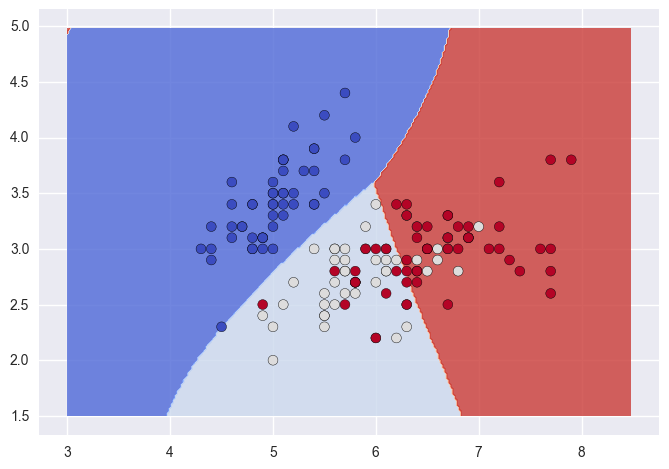

In [22]:
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(x[:,0], x[:,1], s=50, c=y, cmap=plt.cm.coolwarm)